In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix

## Read Data From Saved Files

In [6]:
aussie_rain = joblib.load('aussie_rain2.joblib')

In [7]:
imputer = aussie_rain['imputer']
scaler = aussie_rain['scaler']
encoder = aussie_rain['encoder']
input_cols = aussie_rain['input_cols']
target_col = aussie_rain['target_col']
encoded_cols = aussie_rain['encoded_cols']
numeric_cols = aussie_rain['numeric_cols']
categorical_cols = aussie_rain['categorical_cols']
X_train = aussie_rain['x_train']
X_val = aussie_rain['x_val']
X_test = aussie_rain['x_test']

In [8]:
print(numeric_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [9]:
train_inputs = pd.read_parquet('test_inputs2.parquet')
val_inputs = pd.read_parquet('val_inputs2.parquet')
test_inputs = pd.read_parquet('test_inputs2.parquet')

train_target = pd.read_parquet('train_targets2.parquet')
val_target = pd.read_parquet('val_targets2.parquet')
test_target = pd.read_parquet('test_targets2.parquet')

In [10]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2457,Albury,0.681604,0.798851,0.000000,0.064199,0.532098,ENE,0.372093,None,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2458,Albury,0.693396,0.722222,0.001078,0.064199,0.532098,SSE,0.341085,SSE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2459,Albury,0.634434,0.521073,0.005930,0.064199,0.532098,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2460,Albury,0.608491,0.532567,0.042049,0.064199,0.532098,SSE,0.255814,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2461,Albury,0.566038,0.517241,0.018329,0.064199,0.532098,ENE,0.193798,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,Uluru,0.283019,0.496169,0.000000,0.064199,0.532098,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140783,Uluru,0.266509,0.526820,0.000000,0.064199,0.532098,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140784,Uluru,0.285377,0.563218,0.000000,0.064199,0.532098,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140785,Uluru,0.327830,0.593870,0.000000,0.064199,0.532098,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [11]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2457,Albury,0.681604,0.798851,0.000000,0.064199,0.532098,ENE,0.372093,None,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2458,Albury,0.693396,0.722222,0.001078,0.064199,0.532098,SSE,0.341085,SSE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2459,Albury,0.634434,0.521073,0.005930,0.064199,0.532098,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2460,Albury,0.608491,0.532567,0.042049,0.064199,0.532098,SSE,0.255814,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2461,Albury,0.566038,0.517241,0.018329,0.064199,0.532098,ENE,0.193798,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,Uluru,0.283019,0.496169,0.000000,0.064199,0.532098,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140783,Uluru,0.266509,0.526820,0.000000,0.064199,0.532098,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140784,Uluru,0.285377,0.563218,0.000000,0.064199,0.532098,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140785,Uluru,0.327830,0.593870,0.000000,0.064199,0.532098,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
train_target.reset_index(drop=True)

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
97983,No
97984,No
97985,No
97986,No


In [13]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2457,0.681604,0.798851,0.000000,0.064199,0.532098,0.372093,0.000000,0.080460,0.46,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2458,0.693396,0.722222,0.001078,0.064199,0.532098,0.341085,0.103448,0.195402,0.54,0.30,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2459,0.634434,0.521073,0.005930,0.064199,0.532098,0.325581,0.126437,0.448276,0.62,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2460,0.608491,0.532567,0.042049,0.064199,0.532098,0.255814,0.103448,0.195402,0.74,0.65,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2461,0.566038,0.517241,0.018329,0.064199,0.532098,0.193798,0.068966,0.103448,0.92,0.63,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0.283019,0.496169,0.000000,0.064199,0.532098,0.193798,0.172414,0.149425,0.59,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140783,0.266509,0.526820,0.000000,0.064199,0.532098,0.193798,0.149425,0.126437,0.51,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140784,0.285377,0.563218,0.000000,0.064199,0.532098,0.124031,0.149425,0.103448,0.56,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140785,0.327830,0.593870,0.000000,0.064199,0.532098,0.240310,0.103448,0.103448,0.53,0.24,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
model = DecisionTreeClassifier(random_state=42)

In [16]:
model.fit(X_train, train_target)

DecisionTreeClassifier(random_state=42)

### Evaluation

In [17]:
model.predict(X_train)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [18]:
train_target.reset_index(drop=True)

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
97983,No
97984,No
97985,No
97986,No


Accuracy score

In [19]:
print(f"Training data's Accuracy: {model.score(X_train, train_target) * 100}%")

print(f"Validation data's Accuracy: {model.score(X_val, val_target) * 100}%")

print(f"Test data's Accuracy: {model.score(X_test, test_target) * 100}%")

Training data's Accuracy: 99.99795893374699%
Validation data's Accuracy: 79.35514073380537%
Test data's Accuracy: 77.25009723842862%


Confusion Matrix

In [20]:
confusion_martrix_df = pd.DataFrame(confusion_matrix(test_target, model.predict(X_test), normalize='true'))
confusion_martrix_df.columns = ['Negative (Predicted)', 'Positive (Predicted)']
confusion_martrix_df.index = ['Negative (Actual)', 'Positive (Actual)']
confusion_martrix_df

,Negative (Predicted),Positive (Predicted)
Negative (Actual),0.846367,0.153633
Positive (Actual),0.479657,0.520343


### Visualization

In [21]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.532\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Rainfall <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.009\ngini = 0.316\nsamples = 7347\nvalue = [1443, 5904]'),
 Text(0.8125, 0.125, 

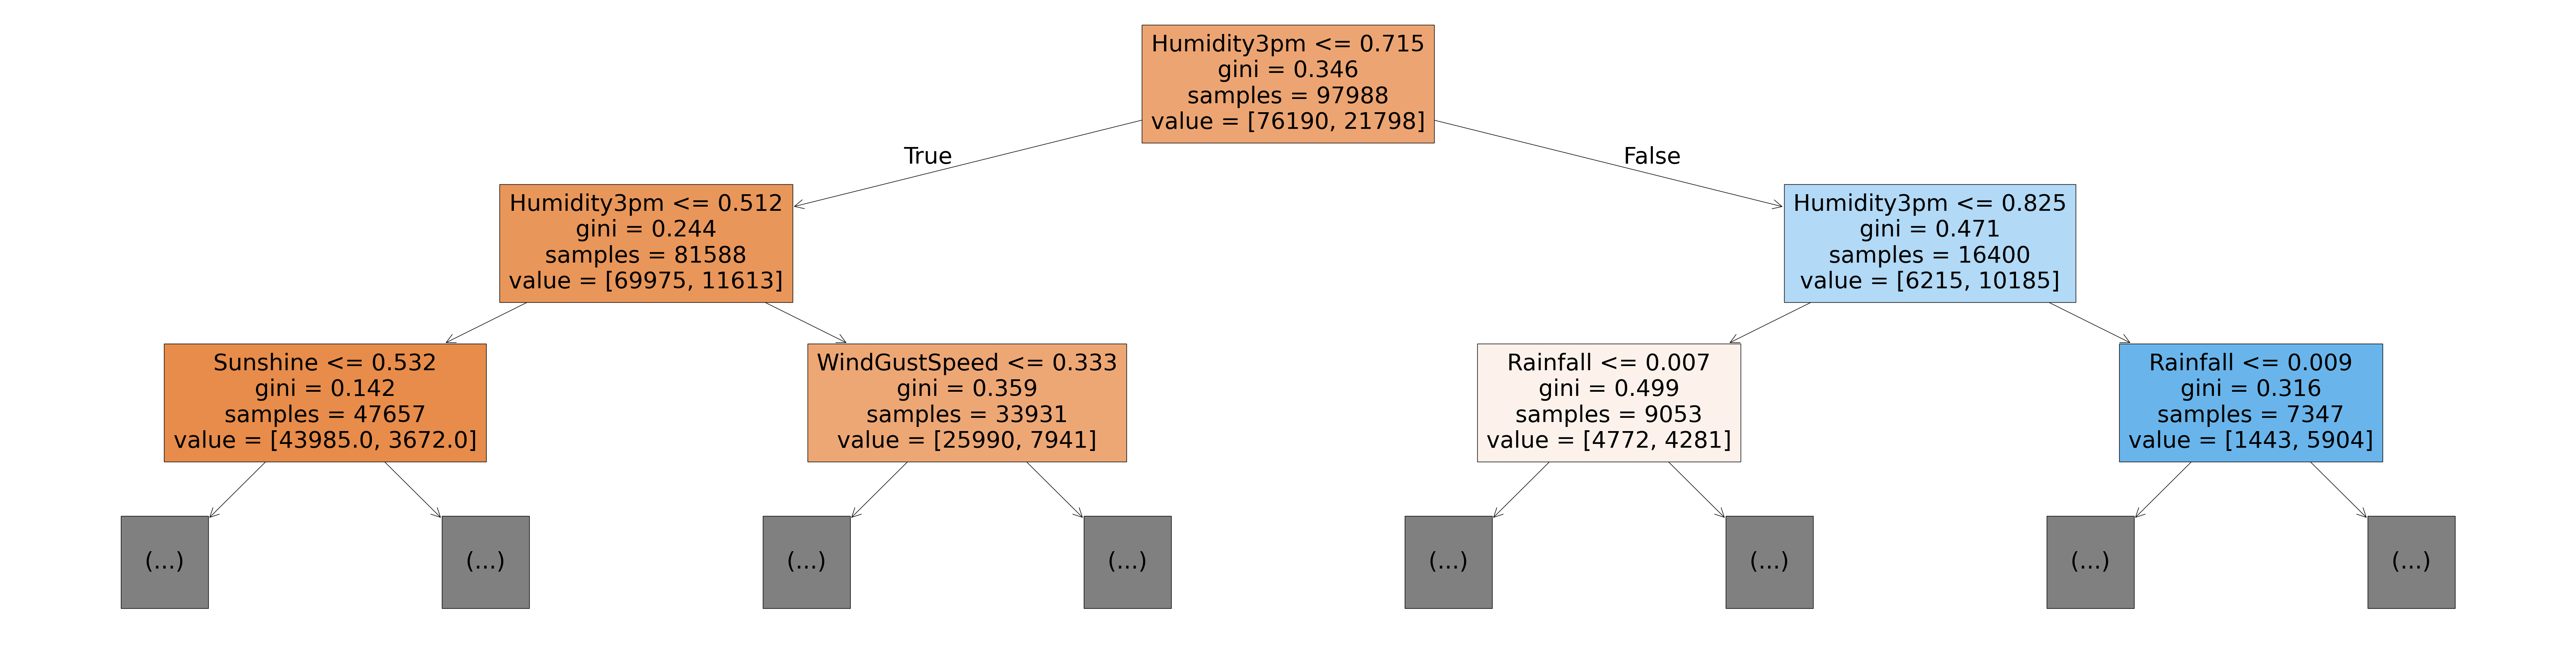

In [22]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

In [23]:
model.tree_.max_depth

51

In [24]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.57
|   |   |   |   |--- Pressure3pm <= 0.42
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- WindSpeed9am <= 0.48
|   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.42
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.06
|   |   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.64
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Temp9am >  0.64
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- Pressure3pm >  0.42
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- WindSpeed9am >  0.48
|   |   |   |   |   |   |   | 

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [25]:
model.feature_importances_

array([3.65611452e-02, 2.90186943e-02, 4.44668146e-02, 2.26395245e-02,
       4.66364113e-02, 6.12327937e-02, 2.70377939e-02, 2.94387315e-02,
       3.73722537e-02, 2.79448972e-01, 3.70119591e-02, 6.10854260e-02,
       1.44797488e-02, 1.73707609e-02, 3.74819093e-02, 3.29204819e-02,
       1.75637879e-03, 1.69392537e-03, 9.40412595e-04, 8.16171798e-04,
       1.52050087e-03, 1.30848647e-03, 1.19350179e-03, 1.67300396e-03,
       5.39064167e-04, 1.38218223e-03, 9.03034078e-04, 2.26779111e-03,
       1.38644675e-03, 5.44270612e-04, 7.60760409e-04, 1.48848407e-03,
       6.16690435e-05, 1.56842182e-03, 1.07125221e-03, 1.40223498e-03,
       7.60390138e-04, 9.81318851e-04, 1.10472517e-03, 1.70224287e-03,
       3.71189667e-04, 6.77918203e-04, 1.28654376e-03, 1.69000234e-03,
       1.12383180e-03, 7.77547401e-04, 5.48566860e-04, 1.36716876e-03,
       1.53148763e-03, 2.09415830e-03, 9.72976473e-04, 1.84953869e-03,
       1.16800672e-03, 2.10814350e-03, 1.14007393e-03, 4.95469343e-04,
      

In [26]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [27]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.279449
5,WindGustSpeed,0.061233
11,Pressure3pm,0.061085
4,Sunshine,0.046636
2,Rainfall,0.044467
14,Temp9am,0.037482
8,Humidity9am,0.037372
10,Pressure9am,0.037012
0,MinTemp,0.036561
15,Temp3pm,0.032920


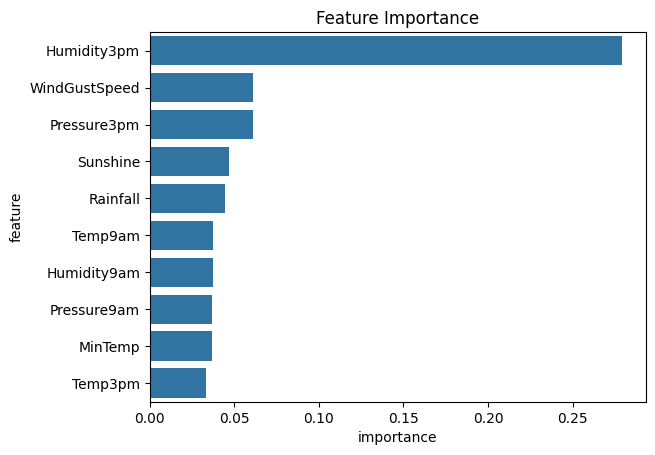

In [28]:
import seaborn as sns
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. 


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

### Method 1: Modifying the max_depth hyperparameter

Setting the max_Depth = 3

In [29]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

Accuracy of the model when the max_depth = 3

In [30]:
print(f"Training data's Accuracy: {model.score(X_train, train_target) * 100}%")

print(f"Validation data's Accuracy: {model.score(X_val, val_target) * 100}%")

print(f"Test data's Accuracy: {model.score(X_test, test_target) * 100}%")

Training data's Accuracy: 83.15916234640977%
Validation data's Accuracy: 83.48060155655685%
Test data's Accuracy: 82.18591987553481%


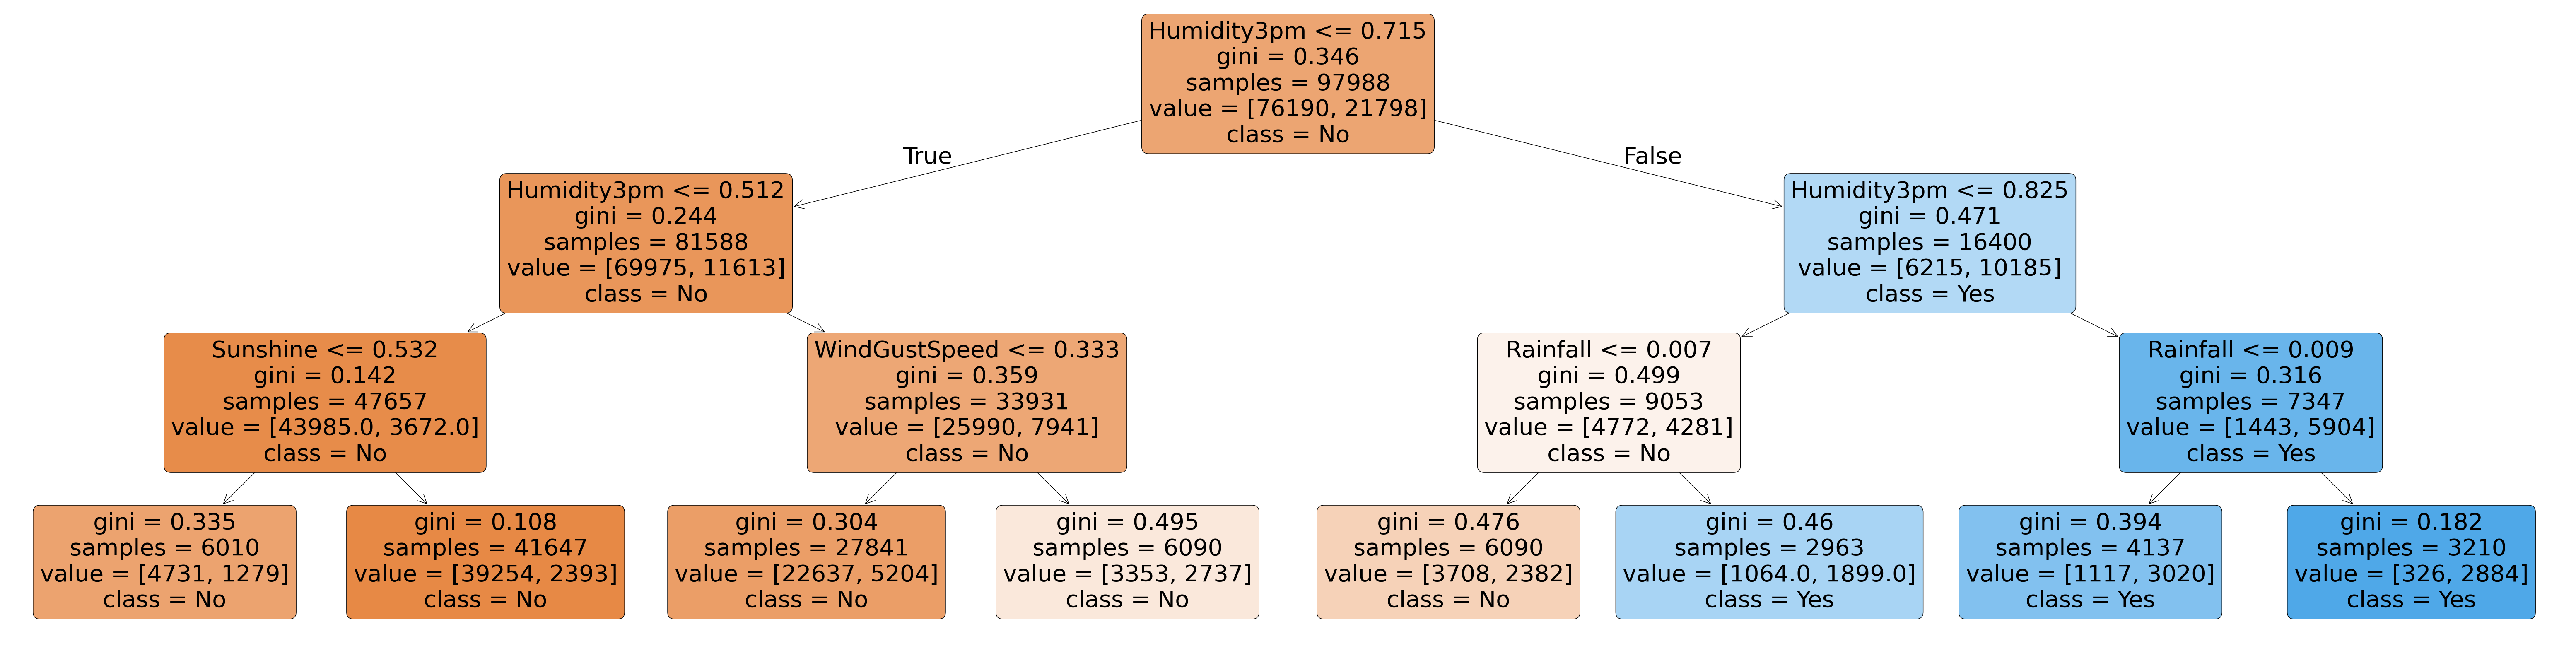

In [31]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

Function to find the best max_depth

In [32]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_target)
    train_acc = model.score(X_train, train_target)
    val_acc = model.score(X_val, val_target)
    return {'Max Depth': md, 'Training Accuracy': train_acc, 'Validation Accuracy': val_acc}

In [ ]:
accuracy_df = pd.DataFrame([max_depth_error(md) for md in range(1, 17)])

In [34]:
accuracy_df.sort_values('Validation Accuracy', ascending=False)

,Max Depth,Training Accuracy,Validation Accuracy
7,8,0.855186,0.846158
8,9,0.860616,0.845573
6,7,0.850941,0.845398
9,10,0.868208,0.844812
5,6,0.846869,0.844169
10,11,0.877199,0.842823
4,5,0.842756,0.841887
11,12,0.886935,0.840365
3,4,0.837847,0.838376
12,13,0.897896,0.835684


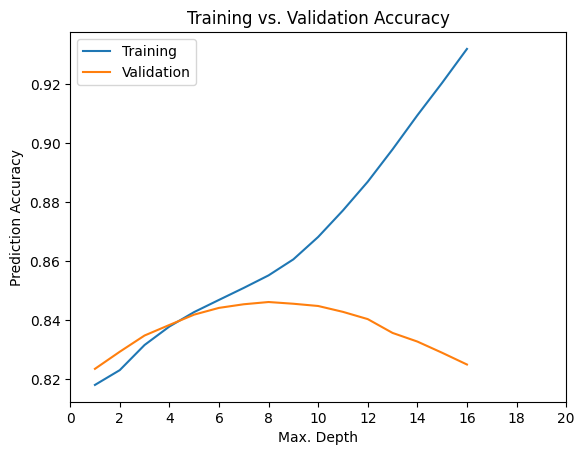

In [35]:
plt.figure()
plt.plot(accuracy_df['Max Depth'], accuracy_df['Training Accuracy'])
plt.plot(accuracy_df['Max Depth'], accuracy_df['Validation Accuracy'])
plt.title('Training vs. Validation Accuracy')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Accuracy')
plt.legend(['Training', 'Validation'])

Conclusion: According to the analyzation --> The best depth = 8 because the Validation Accuracy is the highest
--> Re-train the model using the max_depth of 8

In [36]:
model = DecisionTreeClassifier(max_depth=8, random_state=42)
model.fit(X_train, train_target)


DecisionTreeClassifier(max_depth=8, random_state=42)

In [37]:
model.score(X_val, val_target)

0.8461583474749839

### Method 2: Modifying the max_leaf_nodes hyperparemeter

In [38]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, train_target)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [39]:
model.score(X_train, train_target)

0.852696248520227

In [40]:
model.score(X_val, val_target)

0.8471531394464276

In [41]:
model.tree_.max_depth

11

In [42]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.57
|   |   |   |   |--- Pressure3pm <= 0.42
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.37
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |--- Pressure3pm >  0.42
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Cloud3pm <= 0.39
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Cloud3pm >  0.39
|   |   |   |   |   |   |   |--- Location_Hobart <= 0.50
|   |   |   |   |   |   |   |   |--- WindGustSpeed <= 0.23
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindGustSpeed >  0.23

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [44]:
model.fit(X_train, train_target)

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_jobs=-1, random_state=42)

Accuracy

In [45]:
model.score(X_train, train_target)

0.9999693840062048

In [46]:
model.score(X_val, val_target)

0.8567499561121189

Prediction Probabilities for each records

In [47]:
model.predict_proba(X_train)

array([[0.96, 0.04],
       [0.98, 0.02],
       [0.98, 0.02],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.95, 0.05]])

Confusion matrix

In [50]:
pd.DataFrame(confusion_matrix(val_target, model.predict(X_val), normalize='true'))

,0,1
0,0.967582,0.032418
1,0.561766,0.438234


The number of Decision Trees


In [55]:
len(model.estimators_)

100

Feature Importance

In [57]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [59]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.131487
4,Sunshine,0.059760
11,Pressure3pm,0.053526
10,Pressure9am,0.049247
8,Humidity9am,0.048636
5,WindGustSpeed,0.048084
15,Temp3pm,0.046642
2,Rainfall,0.046375
0,MinTemp,0.042962
1,MaxTemp,0.042010


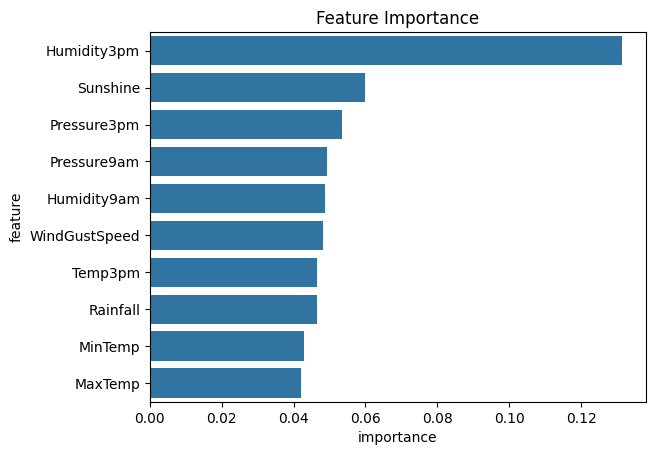

In [60]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning for Random Forest

In [61]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [62]:
model.fit(X_train, train_target)

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [63]:
model.score(X_train, train_target), model.score(X_val, val_target)

(0.992294974894885, 0.8580373339575166)

## Making Predictions on New Inputs

Let's define a helper function to make predictions on new inputs.

In [64]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [65]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [66]:
predict_input(model, new_input)

C:\Users\pc\AppData\Local\Temp\ipykernel_14152\3775630190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\pc\AppData\Local\Temp\ipykernel_14152\3775630190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\pc\AppData\Local\Temp\ipykernel_14152\3775630190.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

('Yes', np.float64(0.7294233840475607))